# 충남대학교 컴퓨터비전
# Image Classification
# 목차

## 실습
# 1. Pytorch 기초
# 2. Linear Classifier 구현


## 과제
## CNN을 활용한 Image Classfication model 구현


##**Pytorch 기초 실습**

<img src = "https://drive.google.com/uc?id=1lZ6La7NmnOhCzSGqgMonYgvsTT_lzM2P" height = 200 width = 500>

##**Pytorch란?**
* **파이토치(PyTorch)**는 컴퓨터 비전 및 자연어 처리와 같은 응용 프로그램에 사용되는 토치(Torch) 라이브러리를 기반으로 하는 기계 학습 프레임워크이다. 현 Meta AI가 개발(구 Facebook)하였다.
* **Tesla Autopilot**, **Uber의 Pyro**, **Hugging Face의 Transformers**, **PyTorch Lightning**를 포함한 많은 딥 러닝 소프트웨어가 PyTorch 위에 구축되어 있습니다.

* Pytorch는 현재 **연구 활동**에서 많은 인기를 얻고 있다

  - https://paperswithcode.com/

  - https://www.knowledgehut.com/blog/data-science/pytorch-vs-tensorflow

* Pytorch의 다양한 기술 문서를 읽고 싶다면 공식 API 사이트 참고
 - https://pytorch.org/docs/stable/tensors.html

<img src = "https://drive.google.com/uc?id=1TIOBfghGmeyXIcF_FIHipmVZKYGOIPse" height = 200 width = 190>
<img src = "https://drive.google.com/uc?id=1FKBzFcQ6cGas7e_oh5G7gWzlA9j64Egh" height = 200 width = 190>
<img src = "https://drive.google.com/uc?id=1iw6u8v-7kqqqcg_O-ieAwnv5ZocgNRkD" height = 200 width = 300>
<img src = "https://drive.google.com/uc?id=1IAR-v86prmPIElUP8pU73svNrx9WcCxN" height = 200 width = 200>



>참고  
실행 전에 **[런타임]** → **[런타임 유형 변경]** → 유형을 **GPU**로 설정해서 GPU를 사용할 수 있게 합니다.  
본 실습은 Pytorch 공식 튜토리얼 https://pytorch.org/tutorials 과 cs231n http://cs231n.stanford.edu/ 자료를 참고하였습니다.


##**Pytorch 기초 실습 구성**
* Tensor 정의
* Tensor Manipulation
* Tensor 연산
* 데이터 불러오기 (CIFAR-10 dataset)
* Pytorch Module API를 이용한 Neural Network 정의 및 사용법
* 간단한 선형 분류기(Linear Classifier) 구현
* 과제 - Convolution을 이용한 이미지 분류기 구현

## **1 Tensor 정의**


### **1.1 Tensor란?**
* Tensor는 배열 및 행렬과 매우 유사한 특수 데이터 구조입니다. PyTorch에서는 텐서를 사용하여 모델의 입력과 출력뿐만 아니라 모델의 매개 변수를 인코딩합니다.

* Tensor는 **GPU**나 다른 하드웨어 가속기에서 실행할 수 있다는 점을 제외하면 NumPy의 배열과 유사하다.
* Tensor는 아래 그림과 같이 기본적으로 3차원이상을 지칭한다.
<img src = "https://drive.google.com/uc?id=1vVKL1YLPd78HQE_oNOED0S4CxRj7HL5i" height = 500 width = 700>

In [1]:
# 사용 할 library import
import torch
import numpy as np
import matplotlib.pyplot as plt

### **1.2 Tensor 초기화하기**
* Tensor는 다양한 방식으로 초기화할수 있다. 다음은 여러 가지 방식들 중 한가지 예이다.

In [2]:
data = [[1, 2],[3, 4]]
x_data = torch.tensor(data)
print(x_data)

tensor([[1, 2],
        [3, 4]])


* Tensor는 Numpy와 자유롭게 상호 변환이 가능합니다.

In [3]:
np_array = np.array(x_data) # tensor -> numpy 변환
print(type(np_array))
x_np = torch.from_numpy(np_array) # numpy -> tensor 변환
print(type(x_np))

<class 'numpy.ndarray'>
<class 'torch.Tensor'>


### **1.3 Tensor 속성(Attributes)**

In [4]:
tensor = torch.rand(3,4)

print(f"tensor의 크기 : {tensor.shape}")
print(f"tensor의 데이터 타입: {tensor.dtype}")
print(f"tensor가 저장된 장치 정보1: {tensor.device}")
tensor = tensor.to('cuda')
print(f"tensor가 저장된 장치 정보2 : {tensor.device}")

tensor의 크기 : torch.Size([3, 4])
tensor의 데이터 타입: torch.float32
tensor가 저장된 장치 정보1: cpu
tensor가 저장된 장치 정보2 : cuda:0


## **2 Tensor Manipulation**

* reshape 속성
* numpy의 reshape와 동일하다. tensor의 차원을 변경

In [5]:
a = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9],
                  [10,11,12]]) # 4 x 3 2차원 tensor

print("tensor a : {}".format(a))
print("tensor a size: {}".format(a.shape))

new_a = a.reshape((3,2,2)) # 3 x 2 x 2 tensor
print("new_a : {}".format(new_a))
print("new_a size : {}".format(new_a.shape))

tensor a : tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
tensor a size: torch.Size([4, 3])
new_a : tensor([[[ 1,  2],
         [ 3,  4]],

        [[ 5,  6],
         [ 7,  8]],

        [[ 9, 10],
         [11, 12]]])
new_a size : torch.Size([3, 2, 2])


## **3 Tensor 주요 연산**


### 3.1 Tensor의 사칙연산

In [6]:
tensor1 = torch.tensor([[1, 2, 3],
                       [4, 5, 6]]) # 2 x 3 2차원 tensor


tensor2 = torch.tensor([[7, 8, 9],
                       [10, 11, 12]]) # 2 x 3 2차원 tensor


tensor3 = torch.tensor([[1, 2],
                        [3, 4],
                        [5, 6]]) # 3 x 2 2차원 tensor


# Element-wise 연산
print("tensor1 + tensor2: \n{}\n".format(tensor1 + tensor2))
print("tensor1 - tensor2: \n{}\n".format(tensor1 - tensor2))
print("tensor1 * tensor2: \n{}\n".format(tensor1 * tensor2))
print("tensor1 / tensor2: \n{}\n".format(tensor1 / tensor2))

tensor1 + tensor2: 
tensor([[ 8, 10, 12],
        [14, 16, 18]])

tensor1 - tensor2: 
tensor([[-6, -6, -6],
        [-6, -6, -6]])

tensor1 * tensor2: 
tensor([[ 7, 16, 27],
        [40, 55, 72]])

tensor1 / tensor2: 
tensor([[0.1429, 0.2500, 0.3333],
        [0.4000, 0.4545, 0.5000]])



In [7]:
# 행렬 곱(matrix multiplication) 연산의 다양한 표현
# (2 x 3) x (3 x 2)
y1 = tensor1 @ tensor3
print(y1)

# Transpose을 취해서도 행렬 곱(matrix multiplication)
# matmul 속성
y2 = tensor1.matmul(tensor1.T)
print(y2)


# 요소별 곱(element-wise multiplication)
# mul 속성
z = tensor1.mul(tensor1)
print(z)

tensor([[22, 28],
        [49, 64]])
tensor([[14, 32],
        [32, 77]])
tensor([[ 1,  4,  9],
        [16, 25, 36]])


### 3.2 최대 최소

In [8]:
tensor = torch.tensor([[1,2,3],
                  [4,5,6],
                  [7,8,9],
                  [10,11,12]]) # 4 x 3 2차원 tensor

print(tensor)
# 전체 최댓값
max_value = tensor.max()
print("max : {}".format(max_value))
# 전체 최솟값
min_value = tensor.min()
print("min : {}".format(min_value))

# 최댓값 index, 축 방향에 따라
# dim : 감소시킬 차원
# dim == 0 : 행(row)을 감소시킴 -> 열 별로
# dim == 1 : 열(column)을 감소시킴 -> 행 별로
values, indices = torch.max(tensor,dim=1)
print("행 방향 최댓값 : {}".format(values))
print("행 방향 최댓값 index : {}".format(indices))


values, indices = torch.max(tensor,dim=0)
print("열 방향 최댓값 : {}".format(values))
print("열 방향 최댓값 index : {}".format(indices))

tensor([[ 1,  2,  3],
        [ 4,  5,  6],
        [ 7,  8,  9],
        [10, 11, 12]])
max : 12
min : 1
행 방향 최댓값 : tensor([ 3,  6,  9, 12])
행 방향 최댓값 index : tensor([2, 2, 2, 2])
열 방향 최댓값 : tensor([10, 11, 12])
열 방향 최댓값 index : tensor([3, 3, 3])


## 4 데이터 불러오기 (CIFAR-10 dataset)
* CIFAT10 dataset은 10개의 분류 범주로 나누어진 60000장의 이미지들로 구성.
* 각 이미지의 크기는 32 x 32
* 훈련 데이터 : 50000장
* 테스트 데이터 : 10000장

<img src = "https://drive.google.com/uc?id=1MR6NfqxqiJonwDfsb_6bh2Oo4k8jmc4b" height = 500 width = 700>


In [2]:
import torchvision
import torchvision.transforms as transforms
print(torch.__version__)

2.1.0+cu121


In [22]:
transform = transforms.Compose(

    [transforms.ToTensor(), # Pytorch의 tensor 타입으로 변경 및 0과 1 사이로 정규화
     # 입력 이미지의 RGB 채널에 대하여 아래와 같이 Normalization 수행
     # Z = (X - 0.5) / 0.5
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

# Batch size : 이미지를 훈련시킬 떄 훈련 시키는 이미지 단위
batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

Files already downloaded and verified
Files already downloaded and verified


In [23]:
# 훈련 데이터 및 테스트 데이터 개수 확인
print(len(trainset)) # 50000 장
print(len(testset)) # 10000 장

50000
10000


In [5]:
# 데이터 정보 확인
for img, label in trainloader:
  print(img.shape) # 4 x 3 x 32 x 32 == 배치 크기 x 채널수(RGB 3채널) x 높이 x 너비
  print(type(img))
  print(type(label))
  # CIFAR-10 Dataset은 -1 ~ 1사이의 값으로 Normalization이 되어있음.
  # CIFAR-10 Dataset의 타입은 float32
  print(img.min())
  print(img.max())
  print(img.dtype)
  print(label.shape)
  print(label) # 0~ 9까지의 범위를 갖음 (총 10개의 클래스)
  break

torch.Size([4, 3, 32, 32])
<class 'torch.Tensor'>
<class 'torch.Tensor'>
tensor(-1.)
tensor(1.)
torch.float32
torch.Size([4])
tensor([3, 8, 6, 6])


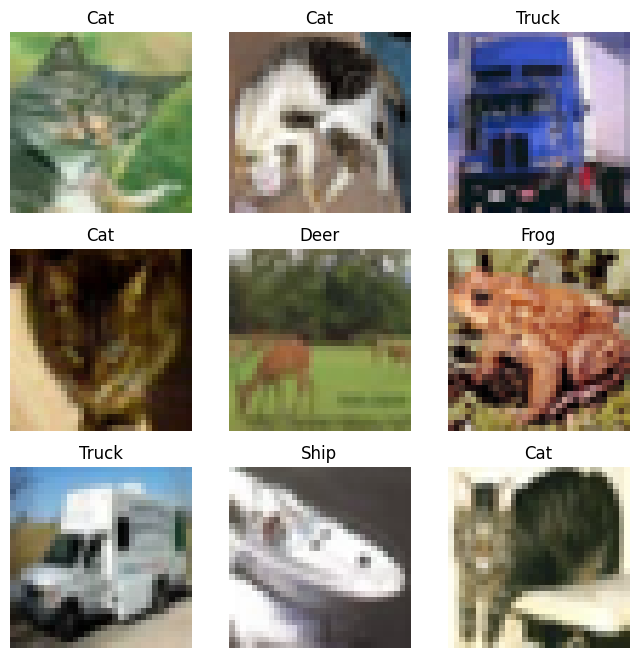

In [6]:
# 데이터 구성 살펴보기 2
# 이미지의 정답을 나타내기 위한 변수
labels_map = {
    0: "Plane",
    1: "Car",
    2: "Bird",
    3: "Cat",
    4: "Deer",
    5: "Dog",
    6: "Frog",
    7: "Horse",
    8: "Ship",
    9: "Truck",
}

# matplolib의 라이브러리를 통해서 데이터를 시각화함.
# 이미지를 시각화하기위한 틀 생성
figure = plt.figure(figsize=(8, 8))
# 행과 열 변수 선언
cols, rows = 3, 3

# 반복문을 통해 이미지를 랜덤으로 추출한 인덱스를 통해서 이미지를 하나씩 나타냄.
for i in range(1, cols * rows + 1):
    sample_idx = torch.randint(len(trainset), size=(1,)).item()
    img, label = trainset[sample_idx]
    # [-1, 1] -> [0, 1]
    img = img / 2 + 0.5
    # Tensor -> Numpy
    img = img.numpy()
    # Tensor는 channel dimension이 앞에 옴
    # Image shape : channel x Height x Width
    # transpose(1, 2, 0): CHW -> HWC
    img = np.transpose(img, (1, 2, 0))
    figure.add_subplot(rows, cols, i)
    plt.title(labels_map[label])
    plt.axis("off")
    plt.imshow(img)
plt.show()



## 5 Pytorch Module API를 이용한 Neural Network 정의 및 사용법

### 5.1 이미지 분류 모델 훈련 개요
  <img src = "https://drive.google.com/uc?id=1GFmMvpqFDKmBQ7ZLqCZqAfyRIkdNKReI">

  <img src = "https://drive.google.com/uc?id=1tN0JNNoqZFW03XrgC0sxqTw1YZSVsJb0">



### 5.2 Pytorch Module API 구조
* Pytorch의 ```nn.Module```을 상속받아 Model을 정의할 클래스를 생성
* 그 클래스의 내부 함수는 모델의 속성 값과 Layer에 대한 정보를 정의하는 ```__init__```함수와 모델이 데이터를 받아 실제 연산을 수행하는 ```forward``` 함수로 크게 구성되어 있다.
* ```forward```의 함수의 경우 모델을 생성 후(클래스의 객체 생성) 인자로 데이터를 받는데 이 함수를 직접 호출하는 것이 아닌 모델 객체에 인자로 넣어주면 ```Backend```으로 실행한다는 것에 주의
* 아래는 간단한 딥러닝 모델을 설계한 예시이다


```python
import torch.nn as nn
import torch.nn.functional as F


class My_Neural_Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

# 모델 객체 생성
net = My_Neural_Net()
# 모델에 데이터를 넣어서 forward함수 실행(backend로)해서 모델의 결과값 출력
# forward 함수를 직접 호출하지 않는 것에 주의한다.
output = net(data)
```

## 6 간단한 선형 분류기(Linear Classifier) 구현
* 2개의 Hidden layer를 갖는 model 구현
* Linear Classifier는 Fullly Connected Layer(줄여서 FC)로 구현
* 다음은 구현 모덜의 간단한 예시

<img src = "https://drive.google.com/uc?id=1OUWMAwigkbWhGgVp3dhxh8jE3Ljiq3TS" height = 400 width = 700>


### 6.1 간단한 선형 분류기(Linear Classifier) 모델 Pytorch 구현
* 모델의 Layer는 총 3개(hidden layer 2개 + output layer 1개)로 구성
* ```nn.Linear(in_features, out_features, bias=True, device=None, dtype=None)```을 사용하여 FC 구현
* ```nn.Linear```의 인자
* ```in_features``` : 입력 데이터의 차원
* ```out_features``` : 결과 값의 차원


In [7]:
from torch import nn
random_seed = 1114
torch.manual_seed(random_seed)

class My_Linear_model(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(32 * 32 * 3, 512)
        self.activation1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 512)
        self.activation2 = nn.ReLU()
        self.out_fc = nn.Linear(512, 10)

    def forward(self, x):


        # x는 기본적으로 4차원 데이터
        # x : 배치 사이즈 x 3(채널수) x 높이 x 너비
        x = x.flatten(1) # 채널 차원부터 ~ 너비까지 모두 1차원 vector로 만듦
        x = self.fc1(x) # x : bs x 512
        x = self.activation1(x)
        x = self.fc2(x)  # x : bs x 512
        x = self.activation2(x)
        x = self.out_fc(x)  # x : bs x 10
        return x

In [8]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(device)
model = My_Linear_model().to(device)
print("model info : \n {}".format(model))

cuda
model info : 
 My_Linear_model(
  (fc1): Linear(in_features=3072, out_features=512, bias=True)
  (activation1): ReLU()
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (activation2): ReLU()
  (out_fc): Linear(in_features=512, out_features=10, bias=True)
)


In [9]:
# Training 하기 전 모델 예측 테스트
x = torch.rand(1,3,32,32,device=device)
output = model(x)
print("output shape : {}".format(output.shape))
prob_output = nn.Softmax(dim=-1)(output)
y_pred = prob_output.argmax(-1)
print("y_pred shape : {}".format(y_pred))
print("predicted class : {}".format(y_pred))


output shape : torch.Size([1, 10])
y_pred shape : tensor([4], device='cuda:0')
predicted class : tensor([4], device='cuda:0')


In [10]:
# loss 및 optimizer 정의
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [11]:
# 훈련 하기


for epoch in range(3):   # 데이터셋을 수차례 반복합니다.

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # [inputs, labels]의 목록인 data로부터 입력을 받은 후;
        inputs, labels = data[0].to(device), data[1].to(device)

        # 변화도(Gradient) 매개변수를 0으로 설정
        # 설정하지 않을 시 Gradient가 누적됨
        optimizer.zero_grad()

        # Foward 수행
        outputs = model(inputs)
        # loss 계산
        loss = criterion(outputs, labels)
        # gradient 계산
        loss.backward()
        # gradient update
        optimizer.step()

        # 통계를 출력합니다.
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 1.922
[1,  4000] loss: 1.690
[1,  6000] loss: 1.634
[1,  8000] loss: 1.587
[1, 10000] loss: 1.559
[1, 12000] loss: 1.509
[2,  2000] loss: 1.415
[2,  4000] loss: 1.435
[2,  6000] loss: 1.442
[2,  8000] loss: 1.409
[2, 10000] loss: 1.400
[2, 12000] loss: 1.389
[3,  2000] loss: 1.294
[3,  4000] loss: 1.288
[3,  6000] loss: 1.295
[3,  8000] loss: 1.296
[3, 10000] loss: 1.299
[3, 12000] loss: 1.301
Finished Training


In [12]:
# 훈련이 끝난 모델의 파라미터 저장
PATH = './cifar_net.pth'
torch.save(model.state_dict(), PATH)

In [13]:
# 새로운 모델 객체를 만들고 저장했던 가중치를 불러옴
new_model = My_Linear_model()
new_model.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [14]:
# Test 데이터로 모델 정확도 평가
correct = 0
total = 0
model.to(device)

# Inference 또는 Test 시 반드시 with torch.no_grad() 문 안에서 수행
# Gradient tracking을 제거하기 때문에 연산 속도가 빠름
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)

        outputs = model(images)

        # torch.max(tensor,dim=1)을 수행하면 첫번째 결과 값으로 실제 값 두번째 값으로 해당 index를 반환
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 51 %


## 7 과제 - CNN(Convolutional Neural Network) 모델 구현하기
* CNN 모델을 자유롭게 구현하여 위의 Linear Classifier의 Test data에 대한 성능보다 더 높게 나오는 것이 목표
* 기본적으로 각 Layer는 ```nn.Conv2d``` -> ```nn.ReLU``` 로 구성(추가로 ```nn.ReLU``` 다음에 ```nn.MaxPool2d```도 사용 가능하나 이건 선택)
* ```nn.Conv2d(in_channels, out_channels, kernel_size, stride=1, padding=0, dilation=1, groups=1, bias=True, padding_mode='zeros', device=None, dtype=None)``` 사용할 것(https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html?highlight=conv2d#torch.nn.Conv2d API 문서 참고)
* ```nn.Conv2d``` 주요 인자
* ```in_channels``` : 입력 데이터의 채널 차원
* ```out_channels``` : 결과로 나올 데이터의 채널 차원
* ```kernel_size``` : convolution 연산 시 사용할 filter 크기(예를들어, 3x3이면 kernel_size=3)
* ```stride``` : convolution 연산 시 보폭(예를들어, stride=2, 2폭)
* ```padding``` : convolution 연산 시 padding 폭(예를들어, padding=1, padding 1폭)
* 그외 나머지 인자는 특별한 언급이 없는 한 사용하지 않아도 무방.
* **Conv 연산시 주의 사항(매우 중요)**
  * Conv연산을 하고나면 일반적으로 데이터의 공간적 크기(높이 x 너비)는 줄어들고 대신 채널 차원은 증가한다. 이것의 의미는 공간적 크기를 줄여가면서 (receptive field를 키워나가면서) 이미지의 특징을 집약한다는 것을 의미.

<img src = "https://drive.google.com/uc?id=1A7k5CemeLt4ILoqDdplfn1jtn9kF9zm2" height = 400 width = 800>

  * Conv연산에 따른 공간적 크기가 각 conv layer를 통과할떄 마다 파악을 하고 있어야 한다. 왜냐하면 마지막 Class에 대한 FC Layer를 정의하기 위해서 인자 값으로 입력 데이터의 차원이 필요한데 이때 차원은 3차원의 이미지를 모두 1차원으로 바꾼다. 따라서 이때 1차원으로 바뀐 차원을 미리 계산하여 파악하고 있어야 한다. 공간적 크기가 어떻게 바뀌는지는 다음과 같은 식에 의해서 계산 가능.(여기서 K : kernel size, S : Stride, P: Padding 폭)

<img src = "https://drive.google.com/uc?id=1hptHexxtLiO0KA0TDMi96BDXKVQ0L6c2">






In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import pytorch_lightning as pl


class BasicBlock(nn.Module):
    expansion = 1

    def __init__(self, in_planes, planes, stride=1):
        super(BasicBlock, self).__init__()
        self.conv1 = nn.Conv2d(
            in_planes, planes, kernel_size=3, stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.mish(self.bn1(self.conv1(x)))
        out = self.bn2(self.conv2(out))
        out += self.shortcut(x)
        out = F.mish(out)
        return out


class Bottleneck(nn.Module):
    expansion = 4

    def __init__(self, in_planes, planes, stride=1):
        super(Bottleneck, self).__init__()
        self.conv1 = nn.Conv2d(in_planes, planes, kernel_size=1, bias=False)
        self.bn1 = nn.BatchNorm2d(planes)
        self.conv2 = nn.Conv2d(planes, planes, kernel_size=3,
                               stride=stride, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(planes)
        self.conv3 = nn.Conv2d(planes, self.expansion *
                               planes, kernel_size=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*planes)

        self.shortcut = nn.Sequential()
        if stride != 1 or in_planes != self.expansion*planes:
            self.shortcut = nn.Sequential(
                nn.Conv2d(in_planes, self.expansion*planes,
                          kernel_size=1, stride=stride, bias=False),
                nn.BatchNorm2d(self.expansion*planes)
            )

    def forward(self, x):
        out = F.mish(self.bn1(self.conv1(x)))
        out = F.mish(self.bn2(self.conv2(out)))
        out = self.bn3(self.conv3(out))
        out += self.shortcut(x)
        out = F.mish(out)
        return out


class ResNet(pl.LightningModule):
    def __init__(self, block, num_blocks, num_classes=10):
        super(ResNet, self).__init__()
        self.in_planes = 64

        self.conv1 = nn.Conv2d(3, 64, kernel_size=3,
                               stride=1, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(64)
        self.layer1 = self._make_layer(block, 64, num_blocks[0], stride=1)
        self.layer2 = self._make_layer(block, 128, num_blocks[1], stride=2)
        self.layer3 = self._make_layer(block, 256, num_blocks[2], stride=2)
        self.layer4 = self._make_layer(block, 512, num_blocks[3], stride=2)
        self.linear = nn.Linear(512*block.expansion, num_classes)

    def _make_layer(self, block, planes, num_blocks, stride):
        strides = [stride] + [1]*(num_blocks-1)
        layers = []
        for stride in strides:
            layers.append(block(self.in_planes, planes, stride))
            self.in_planes = planes * block.expansion
        return nn.Sequential(*layers)

    def forward(self, x):
        out = F.mish(self.bn1(self.conv1(x)))
        out = self.layer1(out)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        out = F.avg_pool2d(out, 4)
        out = out.view(out.size(0), -1)
        out = self.linear(out)
        return out

    
    def configure_optimizers(self):
        optimizer = optim.AdamW(self.parameters(), lr=5e-4)
        return optimizer


    def training_step(self, batch, batch_idx):
        x, y = batch
        y_hat = self(x)
        loss = nn.CrossEntropyLoss()(y_hat, y)
        
        preds = torch.argmax(y_hat, dim=1)
        acc = (preds == y).float().mean()
        
        self.log('train_loss', loss, on_step=True, on_epoch=True, logger=True)
        self.log('train_accuracy', acc, on_step=True, on_epoch=True, logger=True)
        return loss


def ResNet18():
    return ResNet(BasicBlock, [2, 2, 2, 2])


def ResNet34():
    return ResNet(BasicBlock, [3, 4, 6, 3])


def ResNet50():
    return ResNet(Bottleneck, [3, 4, 6, 3])


def ResNet101():
    return ResNet(Bottleneck, [3, 4, 23, 3])


def ResNet152():
    return ResNet(Bottleneck, [3, 8, 36, 3])

In [31]:
# WandbLogger를 초기화
import wandb
from pytorch_lightning.loggers import WandbLogger

wandb.login(key='eed81e1c0a41dd8dd67a4ca90cea1be5a06d4eb0')
wandb_logger = WandbLogger(project='CV', entity='hcim', name='ResNet50_Mish_CIFAR10')

model = ResNet18()

# SwinTransformerModel을 초기화할 때 WandbLogger를 설정
trainer = pl.Trainer(devices=[1], max_epochs=10, logger=wandb_logger)
trainer.fit(model, train_dataloaders=trainloader)

wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs


LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0,1,2,3,4,5,6,7]

  | Name   | Type        | Params
---------------------------------------
0 | conv1  | Conv2d      | 1.7 K 
1 | bn1    | BatchNorm2d | 128   
2 | layer1 | Sequential  | 147 K 
3 | layer2 | Sequential  | 525 K 
4 | layer3 | Sequential  | 2.1 M 
5 | layer4 | Sequential  | 8.4 M 
6 | linear | Linear      | 5.1 K 
---------------------------------------
11.2 M    Trainable params
0         Non-trainable params
11.2 M    Total params
44.696    Total estimated model params size (MB)


Training: |          | 0/? [00:00<?, ?it/s]

`Trainer.fit` stopped: `max_epochs=10` reached.


In [35]:
# Test 데이터로 모델 정확도 평가
correct = 0
total = 0
model.to(device)
with torch.no_grad():
    for data in testloader:
        images, labels = data[0].to(device), data[1].to(device)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 82 %
